#Set Up Environment

In [2]:

! pip install kaggle
! pip install optuna
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle competitions download -c house-prices-advanced-regression-techniques -f train.csv
! kaggle competitions download -c house-prices-advanced-regression-techniques -f test.csv

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.6MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 34.5MB/s]


#Milestone 2 - Fernando Mantilla
This model uses the sci-kit learn ensemble module to simulate a Gradient Boosting Regressor which will model the Ames Housing Dataset. It fits this to cleaned training data which is used to predict house prices on test data. 


##Download Dependencies

In [4]:
#import the necessary dependencies
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from google.colab import data_table
from sklearn.metrics import accuracy_score

##Data Handling

In [74]:
#load the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


#clean the data
cleanup_cats = {"MSZoning":     {"A": 1, "C (all)": 2, "FV": 3, "I": 4, "RH": 5, "RL": 6, "RP": 7, "RM": 0},
                "Street":       {"Grvl": 1, "Pave": 0},
                "Alley" :       {"NA": 1, "Grvl": 2, "Pave": 0}, 
                "LotShape":     {"Reg": 1, "IR1": 2, "IR2": 3, "IR3": 0},
                "LandContour":  {"Lvl": 1, "Bnk": 2, "HLS": 3, "Low": 0},
                "Utilities":    {"AllPub": 0, "NoSewr": 3, "NoSeWa" : 2, "ELO": 1},
                "LotConfig":    {"Inside": 1, "Corner": 2, "CulDSac": 3, "FR2": 4, "FR3": 0},
                "LandSlope":    {"Gtl": 1, "Mod": 2, "Sev": 0},
                "Neighborhood": {"Blmngtn": 1, "Blueste": 2, "BrDale": 3, "BrkSide": 4, "ClearCr": 5, "CollgCr": 6, "Crawfor": 7, "Edwards" : 8, "Gilbert": 9, "IDOTRR": 10, "MeadowV": 11, "Mitchel": 12, "NAmes": 13, "NoRidge": 14, "NPkVill": 15, "NridgHt": 16, "NWAmes": 17, "OldTown": 18, "SWISU": 19, "Sawyer": 20, "SawyerW": 21, "Somerst": 22, "StoneBr": 23, "Timber": 24, "Veenker": 0},
                "Condition1":   {"Artery": 1, "Feedr": 2, "Norm": 3, "RRNn": 4, "RRAn": 5, "PosN": 6, "PosA": 7, "RRNe": 8, "RRAe": 0},
                "Condition2":   {"Artery": 1, "Feedr": 2, "Norm": 3, "RRNn": 4, "RRAn": 5, "PosN": 6, "PosA": 7, "RRNe": 8, "RRAe": 0},
                "BldgType":     {"1Fam": 1, "2fmCon": 2, "Duplex": 3, "TwnhsE": 4, "TwnhsI": 5, "Twnhs": 0},
                "HouseStyle":   {"1Story": 1, "1.5Fin": 2, "1.5Unf": 3, "2Story": 4, "2.5Fin": 5, "2.5Unf": 6, "SFoyer": 7, "SLvl": 0},
                "RoofStyle":    {"Flat": 1, "Gable": 2, "Gambrel": 3, "Hip": 4, "Mansard": 5, "Shed": 0},
                "RoofMatl":     {"ClyTile": 1, "CompShg": 2, "Membran": 3, "Metal": 4, "Roll": 5, "Tar&Grv": 6, "WdShake": 7, "WdShngl": 0},
                "Exterior1st":  {"AsbShng": 1, "AsphShn": 2, "BrkComm": 3, "BrkFace": 4, "CBlock": 5, "CemntBd": 6, "HdBoard": 7, "ImStucc": 8, "MetalSd": 9, "Other": 10, "Plywood": 11, "Precast": 12, "Stone": 13, "Stucco": 14, "VinylSd": 15, "WdShing": 16, "Wd Sdng": 0},
                "Exterior2nd":  {"AsbShng": 1, "AsphShn": 2, "Brk Cmn": 3, "BrkFace": 4, "CBlock": 5, "CmentBd": 6, "HdBoard": 7, "ImStucc": 8, "MetalSd": 9, "Other": 10, "Plywood": 11, "Precast": 12, "Stone": 13, "Stucco": 14, "VinylSd": 15, "Wd Shng": 16, "Wd Sdng": 0},
                "MasVnrType":   {"None": 1, "BrkCmn": 2, "BrkFace": 3, "CBlock": 4, "Stone": 0},
                "ExterQual":    {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 0},
                "ExterCond":    {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 0},
                "Foundation":   {"BrkTil": 1, "CBlock": 2, "PConc": 3, "Slab": 4, "Stone": 5, "Wood": 0},
                "BsmtQual":     {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "NA": 0},
                "BsmtCond":     {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "NA": 0},
                "BsmtExposure": {"NA": 1, "No": 2, "Mn": 3, "Av": 4, "Gd": 0},
                "BsmtFinType1": {"GLQ": 1, "ALQ": 2, "BLQ": 3, "Rec": 4, "LwQ": 5, "Unf": 6, "NA": 0},
                "BsmtFinType2": {"GLQ": 1, "ALQ": 2, "BLQ": 3, "Rec": 4, "LwQ": 5, "Unf": 6, "NA": 0},
                "Heating":      {"Floor": 1, "GasA": 2, "GasW": 3, "Grav": 4, "OthW": 5, "Wall": 0},
                "HeatingQC":    {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 0},
                "CentralAir":   {"N": 0, "Y": 1},
                "Electrical":   {"SBrkr": 1, "FuseA": 2, "FuseF": 3, "FuseP": 4, "Mix": 0},
                "KitchenQual":  {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 0},
                "Functional":   {"Typ": 1, "Min1": 2, "Min2": 3, "Mod": 4, "Maj1": 5, "Maj2": 6, "Sev": 7, "Sal": 0},
                "FireplaceQu":  {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "NA": 0},
                "GarageType":   {"2Types": 1, "Attchd": 2, "Basment": 3, "BuiltIn": 4, "CarPort": 5, "Detchd": 6, "NA": 0},
                "GarageFinish": {"NA": 1, "Unf": 2, "RFn": 3, "Fin": 0},
                "GarageQual":   {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "NA": 0},
                "GarageCond":   {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "NA": 0},
                "PavedDrive":   {"N": 0, "P": 1, "Y": 2},
                "PoolQC":       {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 0},
                "Fence":        {"NA": 1, "MnWw": 2,"GdWo": 3, "MnPrv": 4, "GdPrv": 0},
                "MiscFeature":  {"Elev": 1, "Gar2": 2, "Othr": 3, "Shed": 4, "TenC": 5, "NA": 0},
                "SaleType":     {"WD": 1, "CWD": 2, "VWD": 3, "New": 4, "COD": 5, "Con": 6, "ConLw": 7, "ConLI": 8, "ConLD": 9, "Oth": 0},
                "SaleCondition":{"Normal": 1, "Abnorml": 2, "AdjLand": 3, "Alloca": 4, "Family": 5, "Partial": 0}}


#Drop ID columns
train_data = train_data.drop("Id", axis = 1)
test_data = test_data.drop("Id", axis = 1)


In [75]:
#this is to encode each category with integers
train_data = train_data.replace(cleanup_cats);
test_data = test_data.replace(cleanup_cats);

#remove columns with NaN
removals = train_data.columns[train_data.isnull().any()]
Train_data = train_data.drop(removals, axis = 1)
Test_data = test_data.drop(removals,axis=1 )


In [76]:
#split the training data set
X_train, X_test, y_train, y_test = train_test_split(Train_data.drop('SalePrice', axis=1), Train_data['SalePrice'], test_size=0.2, shuffle = True, random_state=42)

#WITH LIGHT GRADIENT BOOST MODEL
Here, I create a dataset out of the previously split data to feed into a lightgbm model with the objective "regression". As you may be able to tell, the parameters I have chosen were hand-chosen based on trial-and-error.


In [101]:
from lightgbm.callback import early_stopping
import lightgbm as lgb

training_data=lgb.Dataset(X_train,label=y_train)
valid_data=lgb.Dataset(X_test,label=y_test)

#hyper params
params = {
    'metric': 'rmse',
    'boosting_type' : 'gbdt',
    'objective' : 'regression',
    'max_depth' : 2,
    'n_estimators' : 10000,
    'num_leaves' : 4,
    'verbose' : 1,
    'learning_rate': 0.01,
    'min_data_in_leaf': 100
}


lgbm = lgb.train(params,
                 training_data,
                 valid_sets=valid_data,
                 early_stopping_rounds=3000
                 )

Found `n_estimators` in params. Will use it instead of argument
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


Streaming output truncated to the last 5000 lines.
[6316]	valid_0's rmse: 32321.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6317]	valid_0's rmse: 32320.8
[6318]	valid_0's rmse: 32318.8
[6319]	valid_0's rmse: 32318.3
[6320]	valid_0's rmse: 32319.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6321]	valid_0's rmse: 32318.9
[6322]	valid_0's rmse: 32318.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6323]	valid_0's rmse: 32317.3
[6324]	valid_0's rmse: 32318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6325]	valid_0's rmse: 32317.1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6326]	valid_0's rmse: 32317.1
[6327]	valid_0's rmse: 32318.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6328]	valid_0's rmse: 32317.9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6329]	valid_0's rmse: 

In [100]:
y_hat = lgbm.predict(X_test)
df = X_test.copy()
df['SalePrice'] = y_hat
print(df.head(10))
X_train.head(10)


      MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
892           20         6     8414       0         1            1          0   
1105          60         6    12256       0         2            1          0   
413           30         0     8960       0         1            1          0   
522           50         0     5000       0         1            1          0   
1036          20         6    12898       0         2            3          0   
614          180         0     1491       0         1            1          0   
218           50         6    15660       0         2            1          0   
1160         160         6     2280       0         1            1          0   
649          180         0     1936       0         1            1          0   
887           50         6    16466       0         2            1          0   

      LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
892           1          1       

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
254           20         6     8400       0         1            1          0   
1066          60         6     7837       0         2            1          0   
638           30         6     8777       0         1            1          0   
799           50         6     7200       0         1            1          0   
380           50         6     5000       0         1            1          0   
303           20         6     9800       0         1            1          0   
86            60         6    11911       0         3            1          0   
1385          50         0     5436       0         1            1          0   
265           20         6    12090       0         2            1          0   
793           20         6     9158       0         1            1          0   

      LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
254           1          1            13  ...            0              0   
1066          1          1             9  ...           40              0   
638           1          1             8  ...            0            164   
799           2          1            19  ...            0            264   
380           1          1            19  ...            0            242   
303           2          1             6  ...            0              0   
86            1          1             9  ...           38              0   
1385          1          1            10  ...           96              0   
265           1          1            17  ...            0              0   
793           1          1            22  ...          130              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
254           0            0         0        0       6    2010         1   
1066          0            0         0        0       5    2009         1   
638           0            0         0        0       5    2008         1   
799           0            0         0        0       6    2007         1   
380           0            0         0        0       5    2010         1   
303           0            0         0        0       7    2006         1   
86            0            0         0        0       3    2009         1   
1385          0            0         0        0       5    2010         1   
265           0            0         0        0       6    2008         1   
793           0            0         0        0       6    2007         4   

      SaleCondition  
254               1  
1066              1  
638               1  
799               1  
380               1  
303               2  
86                1  
1385              1  
265               1  
793               0  

[10 rows x 60 columns]

#Optuna Optimization

Here I used the Optuna framework to optimize the parameters of a new model, suggesting a starting point, and possible ranges for these features.

In [105]:
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback

def objective(trial, X_train, y_train, X_test, y_test):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 1, 3000, step=1),
        "max_depth": trial.suggest_int("max_depth", 1, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 1.0, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 1.0, step=0.1
        ),
    }

    model = lgb.LGBMRegressor(objective="regression", **param_grid)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric="rmse",
        callbacks=[
            LightGBMPruningCallback(trial, "rmse"),
            early_stopping(3000)
        ],  # Add a pruning callback
    )
    y_pred = model.predict(X_test)

    error = mean_squared_error(y_test, y_pred)

    return error  # An objective value linked with the Trial object.

In [106]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, X_train, y_train, X_test, y_test)
study.optimize(func, n_trials=40)

[I 2023-04-17 01:34:09,820] A new study created in memory with name: LGBM Regressor


[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=6.553586519724484, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.553586519724484
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=6900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6900
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:34:19,229] Trial 0 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07647008241828379, 'num_leaves': 423, 'max_depth': 8, 'min_data_in_leaf': 6900, 'lambda_l1': 35, 'lambda_l2': 100, 'min_gain_to_split': 6.553586519724484, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=12.897968954825165, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.897968954825165
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=2700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2700
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3

[I 2023-04-17 01:34:28,687] Trial 1 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11504059859668476, 'num_leaves': 429, 'max_depth': 5, 'min_data_in_leaf': 2700, 'lambda_l1': 0, 'lambda_l2': 80, 'min_gain_to_split': 12.897968954825165, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=14.313864695190833, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.313864695190833
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1900
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve f

[I 2023-04-17 01:34:38,462] Trial 2 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1151009425997454, 'num_leaves': 801, 'max_depth': 9, 'min_data_in_leaf': 1900, 'lambda_l1': 95, 'lambda_l2': 75, 'min_gain_to_split': 14.313864695190833, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=5.960199375838675, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.960199375838675
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=8300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8300
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3

[I 2023-04-17 01:34:45,924] Trial 3 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12014107758913735, 'num_leaves': 2401, 'max_depth': 8, 'min_data_in_leaf': 8300, 'lambda_l1': 30, 'lambda_l2': 30, 'min_gain_to_split': 5.960199375838675, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.43848158184257, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.43848158184257
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=8900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8900
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:34:55,384] Trial 4 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1307839513109744, 'num_leaves': 2953, 'max_depth': 12, 'min_data_in_leaf': 8900, 'lambda_l1': 70, 'lambda_l2': 45, 'min_gain_to_split': 4.43848158184257, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=6.109815650332015, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.109815650332015
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=9000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9000
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve f

[I 2023-04-17 01:35:07,378] Trial 5 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18517285387058852, 'num_leaves': 1909, 'max_depth': 8, 'min_data_in_leaf': 9000, 'lambda_l1': 100, 'lambda_l2': 35, 'min_gain_to_split': 6.109815650332015, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=10.899572557213567, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.899572557213567
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=5200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for

[I 2023-04-17 01:35:19,309] Trial 6 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1571250538717205, 'num_leaves': 2607, 'max_depth': 11, 'min_data_in_leaf': 5200, 'lambda_l1': 50, 'lambda_l2': 10, 'min_gain_to_split': 10.899572557213567, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=6.334952059577612, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.334952059577612
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=4900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4900
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3

[I 2023-04-17 01:35:31,164] Trial 7 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.048739801770326135, 'num_leaves': 1405, 'max_depth': 10, 'min_data_in_leaf': 4900, 'lambda_l1': 5, 'lambda_l2': 30, 'min_gain_to_split': 6.334952059577612, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=3.890437542816328, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.890437542816328
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=6900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6900
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for

[I 2023-04-17 01:35:42,868] Trial 8 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04187844624454774, 'num_leaves': 457, 'max_depth': 5, 'min_data_in_leaf': 6900, 'lambda_l1': 50, 'lambda_l2': 95, 'min_gain_to_split': 3.890437542816328, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=6.679521462033761, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.679521462033761
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=5000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5000
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:35:55,015] Trial 9 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.23567957313293242, 'num_leaves': 2644, 'max_depth': 1, 'min_data_in_leaf': 5000, 'lambda_l1': 20, 'lambda_l2': 30, 'min_gain_to_split': 6.679521462033761, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.0495655673939801, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0495655673939801
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=6700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6700
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:36:06,803] Trial 10 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2946061639514809, 'num_leaves': 21, 'max_depth': 2, 'min_data_in_leaf': 6700, 'lambda_l1': 70, 'lambda_l2': 65, 'min_gain_to_split': 0.0495655673939801, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=10.236199545707844, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.236199545707844
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=1600, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1600
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for

[I 2023-04-17 01:36:18,662] Trial 11 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.07654315003382442, 'num_leaves': 1107, 'max_depth': 5, 'min_data_in_leaf': 1600, 'lambda_l1': 5, 'lambda_l2': 100, 'min_gain_to_split': 10.236199545707844, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.77542754344958, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.77542754344958
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 300

[I 2023-04-17 01:36:29,582] Trial 12 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.015759900691112827, 'num_leaves': 98, 'max_depth': 6, 'min_data_in_leaf': 500, 'lambda_l1': 25, 'lambda_l2': 80, 'min_gain_to_split': 14.77542754344958, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=9.610990428540086, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.610990428540086
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=3300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3300
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:36:40,590] Trial 13 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08702617243979525, 'num_leaves': 627, 'max_depth': 3, 'min_data_in_leaf': 3300, 'lambda_l1': 0, 'lambda_l2': 85, 'min_gain_to_split': 9.610990428540086, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=12.424390908780744, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.424390908780744
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=3500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3500
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:36:52,510] Trial 14 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09557487823238078, 'num_leaves': 1065, 'max_depth': 4, 'min_data_in_leaf': 3500, 'lambda_l1': 35, 'lambda_l2': 60, 'min_gain_to_split': 12.424390908780744, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=8.574127666768725, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.574127666768725
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=7100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:37:04,575] Trial 15 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06595465709544801, 'num_leaves': 369, 'max_depth': 7, 'min_data_in_leaf': 7100, 'lambda_l1': 15, 'lambda_l2': 90, 'min_gain_to_split': 8.574127666768725, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=12.303673747764964, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.303673747764964
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=10000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10000
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:37:16,632] Trial 16 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.026996946500490157, 'num_leaves': 1675, 'max_depth': 6, 'min_data_in_leaf': 10000, 'lambda_l1': 40, 'lambda_l2': 70, 'min_gain_to_split': 12.303673747764964, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=8.77134204318839, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.77134204318839
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=3900, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3900
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:37:28,670] Trial 17 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1553316048661736, 'num_leaves': 1037, 'max_depth': 8, 'min_data_in_leaf': 3900, 'lambda_l1': 65, 'lambda_l2': 100, 'min_gain_to_split': 8.77134204318839, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=8.154359383408714, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.154359383408714
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=2200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:37:40,738] Trial 18 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06841404194619143, 'num_leaves': 297, 'max_depth': 4, 'min_data_in_leaf': 2200, 'lambda_l1': 15, 'lambda_l2': 55, 'min_gain_to_split': 8.154359383408714, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=11.52950845096658, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.52950845096658
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=6200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:37:52,624] Trial 19 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.011709431474256016, 'num_leaves': 813, 'max_depth': 7, 'min_data_in_leaf': 6200, 'lambda_l1': 85, 'lambda_l2': 85, 'min_gain_to_split': 11.52950845096658, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=13.950871126172208, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.950871126172208
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=7700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7700
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:38:04,509] Trial 20 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.054761961669109974, 'num_leaves': 1313, 'max_depth': 10, 'min_data_in_leaf': 7700, 'lambda_l1': 40, 'lambda_l2': 5, 'min_gain_to_split': 13.950871126172208, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 0 with value: 7677095207.783831.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=13.507670090004288, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.507670090004288
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for

[I 2023-04-17 01:38:51,496] Trial 21 finished with value: 1832924867.566719 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10889427150094211, 'num_leaves': 720, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 95, 'lambda_l2': 75, 'min_gain_to_split': 13.507670090004288, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 21 with value: 1832924867.566719.


[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.398196528468796, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.398196528468796
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:39:11,604] Trial 22 finished with value: 1107111591.7178745 and parameters: {'n_estimators': 10000, 'learning_rate': 0.09227174052619615, 'num_leaves': 634, 'max_depth': 9, 'min_data_in_leaf': 100, 'lambda_l1': 55, 'lambda_l2': 75, 'min_gain_to_split': 13.398196528468796, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 22 with value: 1107111591.7178745.


Early stopping, best iteration is:
[846]	valid_0's rmse: 33273.3	valid_0's l2: 1.10711e+09
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.762533690381279, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.762533690381279
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until va

[I 2023-04-17 01:40:47,411] Trial 23 finished with value: 1318578467.2025561 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0923827721243192, 'num_leaves': 736, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 60, 'lambda_l2': 45, 'min_gain_to_split': 13.762533690381279, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 22 with value: 1107111591.7178745.


[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.545820149509085, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.545820149509085
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:41:00,385] Trial 24 pruned. Trial was pruned at iteration 3001.


Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:41:12,586] Trial 25 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13458164230137284, 'num_leaves': 1704, 'max_depth': 12, 'min_data_in_leaf': 1100, 'lambda_l1': 60, 'lambda_l2': 50, 'min_gain_to_split': 13.338329697016016, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 22 with value: 1107111591.7178745.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.848214343688522, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.848214343688522
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for

[I 2023-04-17 01:41:24,704] Trial 26 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10443947755166548, 'num_leaves': 966, 'max_depth': 9, 'min_data_in_leaf': 1000, 'lambda_l1': 85, 'lambda_l2': 65, 'min_gain_to_split': 14.848214343688522, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 22 with value: 1107111591.7178745.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=11.501706843464298, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.501706843464298
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:41:37,063] Trial 27 pruned. Trial was pruned at iteration 3001.


Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:41:49,029] Trial 28 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0772064072401324, 'num_leaves': 1276, 'max_depth': 9, 'min_data_in_leaf': 2600, 'lambda_l1': 75, 'lambda_l2': 40, 'min_gain_to_split': 12.902493334464323, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 22 with value: 1107111591.7178745.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=13.827512822883651, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.827512822883651
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:42:07,039] Trial 29 finished with value: 1079064009.7672784 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08828308704850689, 'num_leaves': 256, 'max_depth': 11, 'min_data_in_leaf': 100, 'lambda_l1': 55, 'lambda_l2': 60, 'min_gain_to_split': 13.827512822883651, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[574]	valid_0's rmse: 32849.1	valid_0's l2: 1.07906e+09
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=11.694971746749147, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.694971746749147
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=1100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:42:19,203] Trial 30 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06442579015409629, 'num_leaves': 214, 'max_depth': 11, 'min_data_in_leaf': 1100, 'lambda_l1': 50, 'lambda_l2': 70, 'min_gain_to_split': 11.694971746749147, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=14.946678494908936, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.946678494908936
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1500
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve f

[I 2023-04-17 01:42:31,438] Trial 31 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08785820403511613, 'num_leaves': 547, 'max_depth': 9, 'min_data_in_leaf': 1500, 'lambda_l1': 55, 'lambda_l2': 55, 'min_gain_to_split': 14.946678494908936, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.417981622785735, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.417981622785735
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until valid

[I 2023-04-17 01:43:08,448] Trial 32 finished with value: 1168846213.1658614 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1001120754241906, 'num_leaves': 194, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 75, 'lambda_l2': 75, 'min_gain_to_split': 13.417981622785735, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 29 with value: 1079064009.7672784.


[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.181878655995135, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.181878655995135
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:43:21,360] Trial 33 pruned. Trial was pruned at iteration 3001.


Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:43:33,494] Trial 34 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1199631580462772, 'num_leaves': 436, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 45, 'lambda_l2': 75, 'min_gain_to_split': 12.55177360084849, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=13.944244965174844, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.944244965174844
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=2500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2500
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:43:45,540] Trial 35 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10316563838652494, 'num_leaves': 129, 'max_depth': 10, 'min_data_in_leaf': 2500, 'lambda_l1': 60, 'lambda_l2': 50, 'min_gain_to_split': 13.944244965174844, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=12.982507743187444, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.982507743187444
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=1800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1800
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve f

[I 2023-04-17 01:43:57,471] Trial 36 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05770960916919808, 'num_leaves': 858, 'max_depth': 12, 'min_data_in_leaf': 1800, 'lambda_l1': 80, 'lambda_l2': 65, 'min_gain_to_split': 12.982507743187444, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=12.045373038720337, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.045373038720337
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until valid

[I 2023-04-17 01:44:17,643] Trial 37 finished with value: 1101202442.7758107 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12879999860826072, 'num_leaves': 2123, 'max_depth': 10, 'min_data_in_leaf': 100, 'lambda_l1': 65, 'lambda_l2': 80, 'min_gain_to_split': 12.045373038720337, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[578]	valid_0's rmse: 33184.4	valid_0's l2: 1.1012e+09
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=10.80010717058277, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.80010717058277
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=1400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1400
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:44:29,611] Trial 38 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14294306750018326, 'num_leaves': 2348, 'max_depth': 11, 'min_data_in_leaf': 1400, 'lambda_l1': 70, 'lambda_l2': 90, 'min_gain_to_split': 10.80010717058277, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=12.095118183555895, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.095118183555895
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=3100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 3000 rounds


[I 2023-04-17 01:44:41,634] Trial 39 finished with value: 7677095207.783831 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1253824923018295, 'num_leaves': 2117, 'max_depth': 10, 'min_data_in_leaf': 3100, 'lambda_l1': 65, 'lambda_l2': 80, 'min_gain_to_split': 12.095118183555895, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 29 with value: 1079064009.7672784.


Early stopping, best iteration is:
[1]	valid_0's rmse: 203819	valid_0's l2: 4.15423e+10


In [109]:

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best trial: ")
print(study.best_trial )

	Best value (rmse): 1079064009.76728
	Best params:
		n_estimators: 10000
		learning_rate: 0.08828308704850689
		num_leaves: 256
		max_depth: 11
		min_data_in_leaf: 100
		lambda_l1: 55
		lambda_l2: 60
		min_gain_to_split: 13.827512822883651
		bagging_fraction: 1.0
		bagging_freq: 1
		feature_fraction: 0.4
Best trial: 
FrozenTrial(number=29, state=TrialState.COMPLETE, values=[1079064009.7672784], datetime_start=datetime.datetime(2023, 4, 17, 1, 41, 49, 31820), datetime_complete=datetime.datetime(2023, 4, 17, 1, 42, 7, 20694), params={'n_estimators': 10000, 'learning_rate': 0.08828308704850689, 'num_leaves': 256, 'max_depth': 11, 'min_data_in_leaf': 100, 'lambda_l1': 55, 'lambda_l2': 60, 'min_gain_to_split': 13.827512822883651, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={0: 84711.4188050922, 1: 82113.52771845245, 2: 79087.15153097108, 3: 76669.6362643588, 4: 74024.20304940095, 5: 71785.41804205524, 6: 69747.664

In [110]:

params = study.best_params
params["objective"] = "regression"
model = lgb.train(params,
                 training_data,
                 valid_sets=valid_data,
                 early_stopping_rounds = 300
                 )

Found `n_estimators` in params. Will use it instead of argument
'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2639
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 43
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 7.17602e+09
Training until validation scores don't improve for 300 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 6.74263e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 6.25478e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.87823e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 5.47958e+09


#SHAP ANALYSIS
Below, I make use of the Shap module to plot the most influential features in the decisions made by the model, as well as the interaction_value matrix. 

The force plots display the overall weight of the features in making predictions, as well as the weight of certain key features. The most important feature was "GrLivArea: Above grade (ground) living area square feet". Additionally, "OverallQual" mattered the second-most. These two features being key makes sense and are the usual features marketed by real estate agents.

In [10]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.4 MB/s eta 0:00:00


In [111]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values=shap_values, feature_names=X_test.columns)

In [112]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values, feature_names=X_test.columns)

In [113]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values=shap_values, feature_names=X_test.columns)

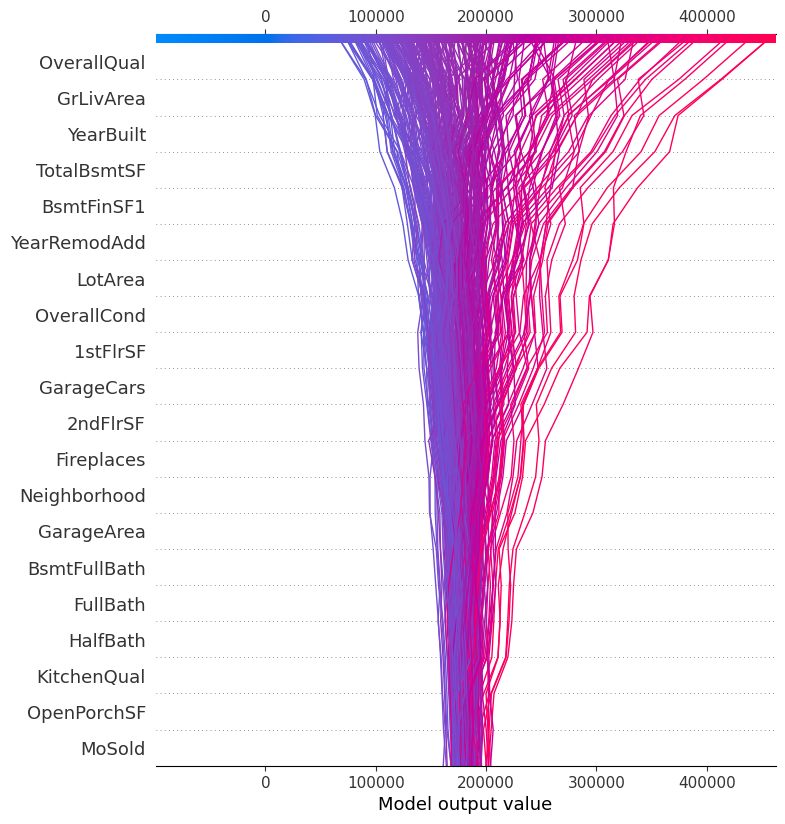

In [114]:
shap.decision_plot(explainer.expected_value, shap_values, feature_names=np.array(X_test.columns))

**For the first prediction, we see the Shapley Interaction values and are able to see the effects of each feature as they are added alone, or in succession to one another. **

In [115]:
interaction_values = explainer.shap_interaction_values(X_test)
interaction_values[0].round(2)
pd.DataFrame(interaction_values[0].round(2)).head(60)

0       1        2    3        4    5    6       7    8       9   ...  \
0  -473.15  -12.77    51.46  0.0   -11.63  0.0  0.0    0.00  0.0   -4.93  ...   
1   -12.77  336.63    18.08  0.0     0.00  0.0  0.0   -1.85  0.0    2.73  ...   
2    51.46   18.08 -1546.88  0.0    -1.64  0.0  0.0   22.90  0.0  204.41  ...   
3     0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
4   -11.63    0.00    -1.64  0.0 -1294.03  0.0  0.0    0.00  0.0   -1.49  ...   
5     0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
6     0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
7     0.00   -1.85    22.90  0.0     0.00  0.0  0.0 -392.65  0.0   16.59  ...   
8     0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
9    -4.93    2.73   204.41  0.0    -1.49  0.0  0.0   16.59  0.0 -183.34  ...   
10  -21.50    0.44    -2.91  0.0    -1.77  0.0  0.0    0.00  0.0   -1.90  ...   
11    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
12    0.00    0.00     2.12  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
13  -64.27    0.00   -24.64  0.0    34.40  0.0  0.0    0.00  0.0    1.88  ...   
14   22.74    5.51   144.14  0.0   -13.18  0.0  0.0    0.00  0.0  -54.40  ...   
15 -149.99    0.00   199.81  0.0    45.89  0.0  0.0    0.00  0.0  -62.85  ...   
16   60.41    1.76  -135.47  0.0    26.00  0.0  0.0  -11.80  0.0 -181.86  ...   
17   -8.57  -13.41   215.39  0.0   -46.53  0.0  0.0    2.67  0.0  -46.63  ...   
18    4.26    0.00   -11.76  0.0   -23.07  0.0  0.0   -2.16  0.0  438.13  ...   
19    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
20   77.99   -4.91   264.93  0.0    39.72  0.0  0.0  -16.17  0.0  -83.00  ...   
21  -14.82    7.08    -3.44  0.0    21.96  0.0  0.0   -0.55  0.0  -62.90  ...   
22   -9.41    0.00  -129.02  0.0    -5.53  0.0  0.0    0.00  0.0  -15.77  ...   
23    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
24   -2.98   -0.60     1.40  0.0     0.00  0.0  0.0    0.00  0.0   -2.96  ...   
25  -22.51   -2.69   161.58  0.0   -87.71  0.0  0.0    7.26  0.0 -138.92  ...   
26   -2.71    0.00     0.00  0.0    -0.96  0.0  0.0    0.00  0.0    0.00  ...   
27  -50.74   11.97     5.33  0.0    -4.86  0.0  0.0    3.40  0.0  -31.70  ...   
28   65.27    5.68   -43.33  0.0    -4.01  0.0  0.0    0.06  0.0 -183.72  ...   
29    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
30  -24.19   -1.01     8.04  0.0   -29.30  0.0  0.0   18.32  0.0   28.35  ...   
31    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
32   24.38  -20.19   151.17  0.0   299.69  0.0  0.0   -9.47  0.0 -164.72  ...   
33   13.49   -1.20    45.97  0.0    18.09  0.0  0.0    3.70  0.0   -9.44  ...   
34    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
35  -52.58   -4.70   -90.61  0.0     8.35  0.0  0.0   19.54  0.0  -12.31  ...   
36    9.44  -15.91     8.33  0.0     2.85  0.0  0.0    0.00  0.0  -47.64  ...   
37    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
38    0.00    0.00     0.59  0.0     0.00  0.0  0.0    0.00  0.0   -3.69  ...   
39   -1.58  -13.63     0.02  0.0   -84.20  0.0  0.0    0.00  0.0   -0.11  ...   
40  -10.32   -5.52   122.90  0.0     3.41  0.0  0.0    0.00  0.0   24.39  ...   
41    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
42   -3.63    0.68   -49.91  0.0     4.54  0.0  0.0    1.89  0.0   67.34  ...   
43  -15.99   -1.26    52.13  0.0     5.41  0.0  0.0    1.06  0.0  -14.33  ...   
44    0.00    0.00     0.00  0.0     0.00  0.0  0.0    0.00  0.0    0.00  ...   
45  -17.06    2.80    28.29  0.0     0.00  0.0  0.0    0.00  0.0  118.61  ...   
46  -16.64    1.75   -25.02  0.0   -19.33  0.0  0.0  -11.43  0.0    9.51  ...   
47 -191.95    9.67  -110.50  0.0    64.19  0.0  0.0   -3.77  0.0 -102.14  ...   
48    0.00    0.00     0.00  0.0     0.